# PySR Noisy Run


In [32]:
# Install libraries
%pip install -U pysr


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /home/richard/Documents/p311a/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
#import pysr

In [34]:
# Call libraries
import numpy as np
#import pandas as pd
from numpy import random
import sympy as sym
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import time

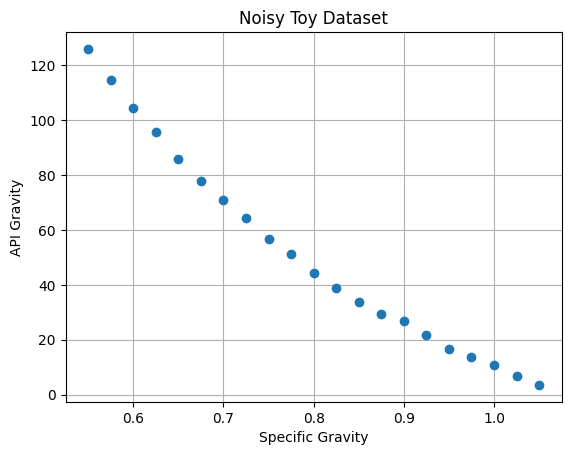

In [35]:
# Build Noisy Toy Dataset
x=np.arange(start=0.55,stop=1.075,step=0.025)
w=(random.rand(21)-0.5)*2.5
y=141.5/x-131.5+w
plt.plot(x,y,marker="o",linestyle="None")
plt.title("Noisy Toy Dataset")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.grid()
plt.show()

In [36]:
t0 = time.time()
myMod=PySRRegressor(random_state=7,deterministic=True,parallelism='serial')
myMod.fit(x.reshape(-1, 1),y)
y_pred=myMod.predict(x.reshape(-1, 1))
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 8.290e+04
Progress: 419 / 3100 total iterations (13.516%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.329e+03  0.000e+00  y = 52.092
3           6.579e+02  3.515e-01  y = 43.972 / x₀
5           4.257e-01  3.672e+00  y = (141.89 / x₀) + -132.06
7           4.141e-01  1.371e-02  y = (-133.61 - (-142.47 / x₀)) + x₀
9           3.716e-01  5.420e-02  y = ((x₀ * 8.8819) + -145.85) - (-147.04 / x₀)
11          3.703e-01  1.714e-03  y = ((x₀ * (x₀ + 6.4707)) + -143.96) - (-146.56 / x₀)
13          3.365e-01  4.789e-02  y = (((((-10.9 / x₀) + 47.928) / x₀) - -73.383) / x₀) + -1...
                                      00.33
17          3.354e-01  7.955e-04  y = ((((102.09 / x₀) + ((-0.058753 / (x₀ / 408.2)) / x₀)) ...
                               

[ Info: Final population:
[ Info: Results saved to:


time to fit:  41.74538969993591 seconds
  - outputs/20250717_100811_WJtdRB/hall_of_fame.csv


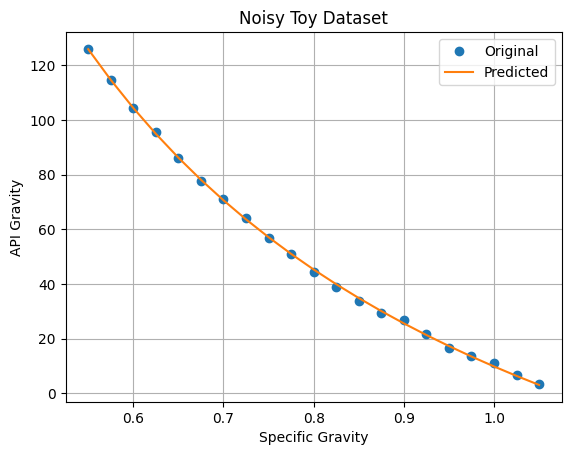

In [ ]:
plt.plot(x,y,marker="o",linestyle="None",label="Original")
plt.plot(x,y_pred,label="Predicted")
plt.title("Noisy Toy Dataset Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.legend()
plt.grid()
plt.show()

In [38]:
myEq=myMod.sympy()
myEq

-1*132.05688 + 141.88547/x0

In [39]:
sym.simplify(myEq)

-132.05688 + 141.88547/x0

In [40]:
x, y = sym.symbols('x y')
myTarg=sym.sympify(141.5/x-131.5)
myTarg

-131.5 + 141.5/x